In [16]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
def to_kaggle_csv(matrix, header,filename):
    frame = pd.DataFrame(data = matrix,columns=header)
    frame.to_csv(path_or_buf  = filename,index = False,sep =',')
    return frame

In [18]:
train_data = np.genfromtxt(delimiter=',',fname='train.csv',skip_header=True)
test_data = np.genfromtxt(delimiter=',',fname='test.csv',skip_header=True)

In [4]:
from sklearn import preprocessing
train_y = train_data[:,0].copy()
train_x = train_data[:,1:].copy()
print(train_x.max())
print(test_data.max(),train_data.max())
img_width, img_height = 28,28
#train_x = train_x.reshape((train_x.shape[0],28,28,1))
#train_x = np.repeat(train_x,3,axis=3 )
#test_x = test_data.reshape((test_data.shape[0],28,28,1))
#test_x = np.repeat(test_x,3,axis=3)
enc = preprocessing.OneHotEncoder()
enc.fit(train_y.reshape((train_y.shape[0],1)))
train_y = enc.transform(train_y.reshape((train_y.shape[0],1))).toarray()
train_x /= 255
test_x  = test_data/255

255.0
255.0 255.0


In [1]:
print(train_y.shape)
print(train_x.shape)
print(train_x.max())

NameError: name 'train_y' is not defined

## Training one layer network for mnist dataset
One layer network doesn't have the capacity to overfit to the training data, so we can expect a similar test accuracy to our training accuracy when submitting to kaggle

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
from keras.layers import Input, Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, ZeroPadding2D
from keras import optimizers
from keras import regularizers
from keras.layers.core import Dense, Activation # defining the layers
from keras.optimizers import RMSprop, SGD
from keras.utils import np_utils
from keras import backend as K

In [7]:
def linear_model(optimizer,epochs,train_x,train_y,regularization = 0,valid_x = None,valid_y = None):
    ## model type is either sequential or model, sequential will be almost enough for our course
    linear_model = Sequential()
    ## now we have an empty model that will be created through sequentially adding layers to it.
    ## add a layer that takes the input image and pass it through a fully connected layer with 512 hidden nodes
    ## dense layer ==> fully connected layer
    linear_model.add(Dense(10,input_shape=(784,),kernel_regularizer=regularizers.l2(regularization)))
    linear_model.add(Activation('softmax'))
    
    ## no need for validation set as this is a simple linear model
    linear_model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,#RMSprop()
                  metrics=['accuracy'])
    if valid_x is None or valid_y is None:
        history = linear_model.fit(train_x,train_y,
                        batch_size = 64,epochs=epochs,
                        verbose=1)#,validation_data=(test, Y_test))
    else:
        history = linear_model.fit(train_x,train_y,
                        batch_size = 64,epochs=epochs,
                        verbose=1,validation_data=(valid_x, valid_y))#,validation_data=(test, Y_test))
    return linear_model,history

In [9]:
adam_model,adam_history = linear_model('adam',300, train_x,train_y) 
sgd_model,sgd_history = linear_model('sgd', 300, train_x,train_y)
rmsprop_model,rmsprop_history =  linear_model('rmsprop', 300, train_x,train_y)

Epoch 1/300
42000/42000 [==============================] - 4s 101us/step - loss: 0.6225 - acc: 0.8462
Epoch 2/300
42000/42000 [==============================] - 4s 99us/step - loss: 0.3431 - acc: 0.9058
Epoch 3/300
42000/42000 [==============================] - 4s 100us/step - loss: 0.3054 - acc: 0.9147
Epoch 4/300
42000/42000 [==============================] - 4s 98us/step - loss: 0.2872 - acc: 0.9189
Epoch 5/300
42000/42000 [==============================] - 4s 98us/step - loss: 0.2760 - acc: 0.9224
Epoch 6/300
42000/42000 [==============================] - 4s 99us/step - loss: 0.2684 - acc: 0.9253
Epoch 7/300
42000/42000 [==============================] - 4s 101us/step - loss: 0.2625 - acc: 0.9253
Epoch 8/300
42000/42000 [==============================] - 4s 97us/step - loss: 0.2574 - acc: 0.9278
Epoch 9/300
42000/42000 [==============================] - 4s 97us/step - loss: 0.2536 - acc: 0.9286
Epoch 10/300
42000/42000 [==============================] - 4s 98us/step - loss: 0.2501 

42000/42000 [==============================] - 4s 97us/step - loss: 0.1940 - acc: 0.9449
Epoch 160/300
42000/42000 [==============================] - 4s 100us/step - loss: 0.1936 - acc: 0.9451
Epoch 161/300
42000/42000 [==============================] - 4s 99us/step - loss: 0.1933 - acc: 0.9456
Epoch 162/300
42000/42000 [==============================] - 4s 101us/step - loss: 0.1932 - acc: 0.9452
Epoch 163/300
42000/42000 [==============================] - 4s 98us/step - loss: 0.1933 - acc: 0.9453
Epoch 164/300
42000/42000 [==============================] - 4s 98us/step - loss: 0.1932 - acc: 0.9452
Epoch 165/300
42000/42000 [==============================] - 4s 100us/step - loss: 0.1931 - acc: 0.9455
Epoch 166/300
42000/42000 [==============================] - 4s 97us/step - loss: 0.1929 - acc: 0.9449
Epoch 167/300
42000/42000 [==============================] - 4s 99us/step - loss: 0.1931 - acc: 0.9447
Epoch 168/300
42000/42000 [==============================] - 4s 100us/step - loss: 0

42000/42000 [==============================] - 4s 92us/step - loss: 0.3376 - acc: 0.9064
Epoch 18/300
42000/42000 [==============================] - 4s 91us/step - loss: 0.3344 - acc: 0.9071
Epoch 19/300
42000/42000 [==============================] - 4s 91us/step - loss: 0.3314 - acc: 0.9080
Epoch 20/300
42000/42000 [==============================] - 4s 91us/step - loss: 0.3287 - acc: 0.9082
Epoch 21/300
42000/42000 [==============================] - 4s 90us/step - loss: 0.3262 - acc: 0.9096
Epoch 22/300
42000/42000 [==============================] - 4s 91us/step - loss: 0.3238 - acc: 0.9094
Epoch 23/300
42000/42000 [==============================] - 4s 93us/step - loss: 0.3216 - acc: 0.9102
Epoch 24/300
42000/42000 [==============================] - 4s 92us/step - loss: 0.3196 - acc: 0.9109
Epoch 25/300
42000/42000 [==============================] - 4s 90us/step - loss: 0.3177 - acc: 0.9112
Epoch 26/300
42000/42000 [==============================] - 4s 90us/step - loss: 0.3158 - acc: 

42000/42000 [==============================] - 4s 102us/step - loss: 0.2695 - acc: 0.9247
Epoch 98/300
42000/42000 [==============================] - 4s 101us/step - loss: 0.2692 - acc: 0.9247
Epoch 99/300
42000/42000 [==============================] - 4s 103us/step - loss: 0.2690 - acc: 0.9248
Epoch 100/300
42000/42000 [==============================] - 4s 103us/step - loss: 0.2686 - acc: 0.9250
Epoch 101/300
42000/42000 [==============================] - 4s 101us/step - loss: 0.2685 - acc: 0.9250
Epoch 102/300
42000/42000 [==============================] - 4s 104us/step - loss: 0.2682 - acc: 0.9251
Epoch 103/300
42000/42000 [==============================] - 4s 99us/step - loss: 0.2679 - acc: 0.9251
Epoch 104/300
42000/42000 [==============================] - 4s 103us/step - loss: 0.2676 - acc: 0.9250
Epoch 105/300
42000/42000 [==============================] - 4s 101us/step - loss: 0.2674 - acc: 0.9251
Epoch 106/300
42000/42000 [==============================] - 4s 102us/step - loss

42000/42000 [==============================] - 4s 105us/step - loss: 0.2468 - acc: 0.9308
Epoch 256/300
42000/42000 [==============================] - 4s 106us/step - loss: 0.2467 - acc: 0.9311
Epoch 257/300
42000/42000 [==============================] - 4s 104us/step - loss: 0.2467 - acc: 0.9310
Epoch 258/300
42000/42000 [==============================] - 4s 103us/step - loss: 0.2465 - acc: 0.9313
Epoch 259/300
42000/42000 [==============================] - 4s 104us/step - loss: 0.2465 - acc: 0.9314
Epoch 260/300
42000/42000 [==============================] - 4s 105us/step - loss: 0.2464 - acc: 0.9311
Epoch 261/300
42000/42000 [==============================] - 4s 105us/step - loss: 0.2464 - acc: 0.9311
Epoch 262/300
42000/42000 [==============================] - 4s 104us/step - loss: 0.2463 - acc: 0.9313
Epoch 263/300
42000/42000 [==============================] - 4s 104us/step - loss: 0.2462 - acc: 0.9312
Epoch 264/300
42000/42000 [==============================] - 4s 103us/step - l

42000/42000 [==============================] - 4s 103us/step - loss: 0.2376 - acc: 0.9403
Epoch 115/300
42000/42000 [==============================] - 5s 109us/step - loss: 0.2377 - acc: 0.9413
Epoch 116/300
42000/42000 [==============================] - 4s 106us/step - loss: 0.2376 - acc: 0.9404
Epoch 117/300
42000/42000 [==============================] - 5s 108us/step - loss: 0.2376 - acc: 0.9413
Epoch 118/300
42000/42000 [==============================] - 4s 107us/step - loss: 0.2377 - acc: 0.9411
Epoch 119/300
42000/42000 [==============================] - 5s 109us/step - loss: 0.2371 - acc: 0.9414
Epoch 120/300
42000/42000 [==============================] - 4s 105us/step - loss: 0.2376 - acc: 0.9407
Epoch 121/300
42000/42000 [==============================] - 4s 105us/step - loss: 0.2376 - acc: 0.9408
Epoch 122/300
42000/42000 [==============================] - 4s 107us/step - loss: 0.2374 - acc: 0.9411
Epoch 123/300
42000/42000 [==============================] - 4s 105us/step - l

42000/42000 [==============================] - 4s 105us/step - loss: 0.2371 - acc: 0.9441
Epoch 273/300
42000/42000 [==============================] - 4s 105us/step - loss: 0.2374 - acc: 0.9439
Epoch 274/300
42000/42000 [==============================] - 4s 104us/step - loss: 0.2372 - acc: 0.9440
Epoch 275/300
42000/42000 [==============================] - 4s 107us/step - loss: 0.2372 - acc: 0.9439
Epoch 276/300
42000/42000 [==============================] - 4s 106us/step - loss: 0.2369 - acc: 0.9444
Epoch 277/300
42000/42000 [==============================] - 4s 105us/step - loss: 0.2374 - acc: 0.9439
Epoch 278/300
42000/42000 [==============================] - 4s 106us/step - loss: 0.2367 - acc: 0.9444
Epoch 279/300
42000/42000 [==============================] - 4s 107us/step - loss: 0.2375 - acc: 0.9444
Epoch 280/300
42000/42000 [==============================] - 4s 106us/step - loss: 0.2373 - acc: 0.9438
Epoch 281/300
42000/42000 [==============================] - 4s 104us/step - l

Populating the interactive namespace from numpy and matplotlib


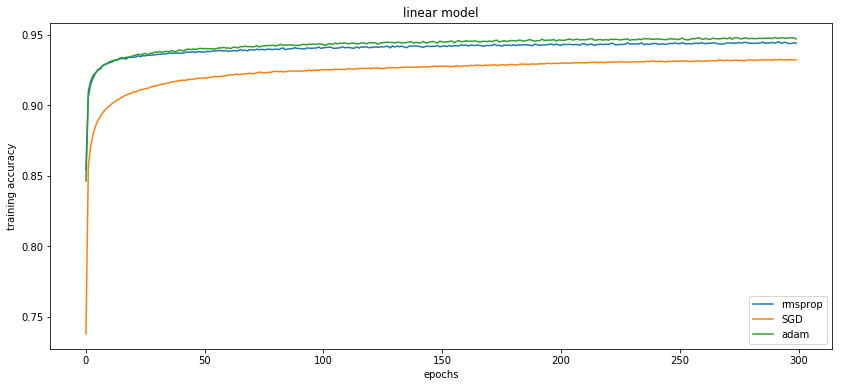

0.943904761905 0.946833333333


In [12]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)
plt.figure()
hist1 = rmsprop_history.history['acc']
hist2 = sgd_history.history['acc']
hist3 = adam_history.history['acc']
plt.title('linear model')
plt.xlabel('epochs')
plt.ylabel('training accuracy')
plt.plot(hist1,label='rmsprop')
plt.plot(hist2,label='SGD')
plt.plot(hist3,label='adam')
plt.legend()
plt.show()
print(hist1[-1],hist3[-1])

In [164]:
def generate_submission(model,data,filename,file_columns = None):
    predictions = model.predict(test_x)
    result = predictions.argmax(axis =1 )
    result = result.reshape((28000,1))
    ids = (np.arange(28000)+1).reshape((28000,1))
    result = np.hstack((ids,result))
    m = to_kaggle_csv(result,file_columns, filename)

In [139]:
predictions.shape
result = predictions.argmax(axis =1 )
result.shape
result = result.reshape((28000,1))
ids = (np.arange(28000)+1).reshape((28000,1))
result = np.hstack((ids,result))
print(result[:4,:],result.shape)
m = to_kaggle_csv(result,['ImageId','Label'],'submission_adam_model_300ep_no_regularization.csv')
print(m.head())
#plt.imshow(test_x[3,:].reshape((28,28)))
#plt.show()

[1 2 3 4]
[[1 2]
 [2 0]
 [3 9]
 [4 7]] (28000, 2)
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      7
4        5      3


### Summary for the linear model
####  The output of the linear model
the submission got the 1653th place out of 1879, this is the top 87.9% with accuracy of 91.6%, which is really bad for mnist dataset, as it's the easiest task you'll ever workon and it's far below our human level accuracy.
Note that training accuracy is around 94.4% and the submission accuracy is around 91.6%.
We've been training for around 270 epochs
<img src="1-linearmodel.PNG" height="300" width = "800" >

## Linear models with regularization

now the model is overfitting --> training acc is 94.4 and submission accuracy is 91.6.
Next step is to add regularization and reduce overfitting --> thus we need a separate validation set to monitor overfitting.
We'll find that a linear model isn't capable of overfitting and any further regularization will only reduce the training error, as the model doesn't have the capacity to overfit

That's why it's a best practice in neural networks to overfit the data first to make sure that your model is good, then add regularization to generalize better, but you shouldn't spend anytime trying to prevent overfitting using a model with high bias (simple models).

In [13]:
from sklearn.model_selection import train_test_split
## validation set
y = train_data[:,0]
X = train_data[:,1:]
enc = preprocessing.OneHotEncoder()
enc.fit(y.reshape((y.shape[0],1)))
train_y = enc.transform(y.reshape((y.shape[0],1))).toarray()
X /= 255
test_x  = test_data/255
train_x, valid_x, train_y, valid_y = train_test_split(X, train_y, test_size=0.2, random_state=42)

print(train_x.max())
print(test_x.max())
print(valid_x.max())

0.00392156862745
1.0
0.00392156862745


In [14]:
regs = [0.1,0.01,0.001,0.0001,0]
models = []
optimizer = 'rmsprop'
histories = []
for reg in regs:
    model,history = linear_model(optimizer,150, train_x,train_y,regularization=reg,valid_x=valid_x,valid_y=valid_y)
    models.append(model)
    histories.append(history)

Train on 33600 samples, validate on 8400 samples
Epoch 1/150
33600/33600 [==============================] - 4s 123us/step - loss: 2.3712 - acc: 0.1132 - val_loss: 2.3014 - val_acc: 0.1082
Epoch 2/150
33600/33600 [==============================] - 4s 121us/step - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1082
Epoch 3/150
33600/33600 [==============================] - 4s 121us/step - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3013 - val_acc: 0.1082
Epoch 4/150
33600/33600 [==============================] - 4s 118us/step - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1082
Epoch 5/150
33600/33600 [==============================] - 4s 118us/step - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3013 - val_acc: 0.1082
Epoch 6/150
33600/33600 [==============================] - 4s 120us/step - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1082
Epoch 7/150
33600/33600 [==============================] - 4s 117us/step - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3

33600/33600 [==============================] - 3s 83us/step - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3014 - val_acc: 0.1082
Epoch 118/150
33600/33600 [==============================] - 4s 119us/step - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3013 - val_acc: 0.1082
Epoch 119/150
33600/33600 [==============================] - 4s 119us/step - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1082
Epoch 120/150
33600/33600 [==============================] - 4s 113us/step - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1082
Epoch 121/150
33600/33600 [==============================] - 4s 118us/step - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1082
Epoch 122/150
33600/33600 [==============================] - 4s 118us/step - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3013 - val_acc: 0.1082
Epoch 123/150
33600/33600 [==============================] - 4s 115us/step - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3013 - val_acc: 0.1082
Epoch 124/150
33600/33600 [=

33600/33600 [==============================] - 4s 132us/step - loss: 2.3010 - acc: 0.1124 - val_loss: 2.3007 - val_acc: 0.1082
Epoch 84/150
33600/33600 [==============================] - 5s 135us/step - loss: 2.3011 - acc: 0.1124 - val_loss: 2.3006 - val_acc: 0.1082
Epoch 85/150
33600/33600 [==============================] - 4s 129us/step - loss: 2.3010 - acc: 0.1124 - val_loss: 2.3006 - val_acc: 0.1082
Epoch 86/150
33600/33600 [==============================] - 4s 133us/step - loss: 2.3010 - acc: 0.1124 - val_loss: 2.3007 - val_acc: 0.1082
Epoch 87/150
33600/33600 [==============================] - 4s 129us/step - loss: 2.3011 - acc: 0.1124 - val_loss: 2.3007 - val_acc: 0.1082
Epoch 88/150
33600/33600 [==============================] - 4s 132us/step - loss: 2.3010 - acc: 0.1124 - val_loss: 2.3006 - val_acc: 0.1082
Epoch 89/150
33600/33600 [==============================] - 4s 131us/step - loss: 2.3011 - acc: 0.1124 - val_loss: 2.3008 - val_acc: 0.1082
Epoch 90/150
33600/33600 [=======

33600/33600 [==============================] - 4s 119us/step - loss: 2.2972 - acc: 0.1124 - val_loss: 2.2968 - val_acc: 0.1082
Epoch 50/150
33600/33600 [==============================] - 4s 117us/step - loss: 2.2972 - acc: 0.1124 - val_loss: 2.2966 - val_acc: 0.1082
Epoch 51/150
33600/33600 [==============================] - 4s 118us/step - loss: 2.2972 - acc: 0.1124 - val_loss: 2.2968 - val_acc: 0.1082
Epoch 52/150
33600/33600 [==============================] - 4s 119us/step - loss: 2.2972 - acc: 0.1124 - val_loss: 2.2968 - val_acc: 0.1082
Epoch 53/150
33600/33600 [==============================] - 4s 115us/step - loss: 2.2972 - acc: 0.1124 - val_loss: 2.2968 - val_acc: 0.1082
Epoch 54/150
33600/33600 [==============================] - 4s 117us/step - loss: 2.2972 - acc: 0.1124 - val_loss: 2.2967 - val_acc: 0.1082
Epoch 55/150
33600/33600 [==============================] - 4s 118us/step - loss: 2.2972 - acc: 0.1124 - val_loss: 2.2968 - val_acc: 0.1082
Epoch 56/150
33600/33600 [=======

33600/33600 [==============================] - 4s 131us/step - loss: 2.2596 - acc: 0.3756 - val_loss: 2.2592 - val_acc: 0.3699
Epoch 16/150
33600/33600 [==============================] - 4s 129us/step - loss: 2.2596 - acc: 0.3710 - val_loss: 2.2595 - val_acc: 0.3667
Epoch 17/150
33600/33600 [==============================] - 4s 129us/step - loss: 2.2596 - acc: 0.3777 - val_loss: 2.2594 - val_acc: 0.3763
Epoch 18/150
33600/33600 [==============================] - 4s 126us/step - loss: 2.2596 - acc: 0.3701 - val_loss: 2.2595 - val_acc: 0.3800
Epoch 19/150
33600/33600 [==============================] - 4s 132us/step - loss: 2.2596 - acc: 0.3833 - val_loss: 2.2594 - val_acc: 0.3586
Epoch 20/150
33600/33600 [==============================] - 3s 83us/step - loss: 2.2596 - acc: 0.3526 - val_loss: 2.2590 - val_acc: 0.4089
Epoch 21/150
33600/33600 [==============================] - 2s 61us/step - loss: 2.2596 - acc: 0.3771 - val_loss: 2.2592 - val_acc: 0.3799
Epoch 22/150
33600/33600 [=========

Epoch 74/150
33600/33600 [==============================] - 2s 52us/step - loss: 2.2596 - acc: 0.3885 - val_loss: 2.2592 - val_acc: 0.3704
Epoch 75/150
33600/33600 [==============================] - 2s 52us/step - loss: 2.2596 - acc: 0.3776 - val_loss: 2.2592 - val_acc: 0.3743
Epoch 76/150
33600/33600 [==============================] - 2s 51us/step - loss: 2.2596 - acc: 0.3774 - val_loss: 2.2596 - val_acc: 0.3615
Epoch 77/150
33600/33600 [==============================] - 2s 53us/step - loss: 2.2596 - acc: 0.3710 - val_loss: 2.2592 - val_acc: 0.3755
Epoch 78/150
33600/33600 [==============================] - 2s 54us/step - loss: 2.2596 - acc: 0.3689 - val_loss: 2.2593 - val_acc: 0.4001
Epoch 79/150
33600/33600 [==============================] - 2s 54us/step - loss: 2.2596 - acc: 0.3962 - val_loss: 2.2594 - val_acc: 0.3532
Epoch 80/150
33600/33600 [==============================] - 2s 54us/step - loss: 2.2596 - acc: 0.3468 - val_loss: 2.2592 - val_acc: 0.4156
Epoch 81/150
33600/33600 [=

Epoch 133/150
33600/33600 [==============================] - 2s 54us/step - loss: 2.2596 - acc: 0.3833 - val_loss: 2.2592 - val_acc: 0.3735
Epoch 134/150
33600/33600 [==============================] - 2s 54us/step - loss: 2.2596 - acc: 0.3644 - val_loss: 2.2591 - val_acc: 0.4177
Epoch 135/150
33600/33600 [==============================] - 2s 54us/step - loss: 2.2596 - acc: 0.3871 - val_loss: 2.2594 - val_acc: 0.4052
Epoch 136/150
33600/33600 [==============================] - 2s 54us/step - loss: 2.2596 - acc: 0.3934 - val_loss: 2.2593 - val_acc: 0.3892
Epoch 137/150
33600/33600 [==============================] - 2s 54us/step - loss: 2.2596 - acc: 0.3898 - val_loss: 2.2594 - val_acc: 0.3842
Epoch 138/150
33600/33600 [==============================] - 2s 54us/step - loss: 2.2596 - acc: 0.3822 - val_loss: 2.2594 - val_acc: 0.3868
Epoch 139/150
33600/33600 [==============================] - 2s 54us/step - loss: 2.2596 - acc: 0.3859 - val_loss: 2.2594 - val_acc: 0.3813
Epoch 140/150
33600/

33600/33600 [==============================] - 2s 51us/step - loss: 0.4789 - acc: 0.8834 - val_loss: 0.4824 - val_acc: 0.8802
Epoch 101/150
33600/33600 [==============================] - 2s 51us/step - loss: 0.4767 - acc: 0.8842 - val_loss: 0.4803 - val_acc: 0.8799
Epoch 102/150
33600/33600 [==============================] - 2s 51us/step - loss: 0.4745 - acc: 0.8841 - val_loss: 0.4781 - val_acc: 0.8807
Epoch 103/150
33600/33600 [==============================] - 2s 51us/step - loss: 0.4724 - acc: 0.8847 - val_loss: 0.4760 - val_acc: 0.8817
Epoch 104/150
33600/33600 [==============================] - 2s 51us/step - loss: 0.4703 - acc: 0.8847 - val_loss: 0.4742 - val_acc: 0.8817
Epoch 105/150
33600/33600 [==============================] - 2s 51us/step - loss: 0.4683 - acc: 0.8857 - val_loss: 0.4722 - val_acc: 0.8812
Epoch 106/150
33600/33600 [==============================] - 2s 52us/step - loss: 0.4663 - acc: 0.8854 - val_loss: 0.4702 - val_acc: 0.8821
Epoch 107/150
33600/33600 [=======

In [15]:
print('regularizaiton','training acc','validation acc')
for idx, histor in enumerate(histories):
    tr_acc    = histor.history['acc'][-1]
    valid_acc = histor.history['val_acc'][-1]
    print(regs[idx],tr_acc,valid_acc)




regularizaiton training acc validation acc
0.1 0.112351190476 0.108214285714
0.01 0.112351190476 0.108214285714
0.001 0.112351190476 0.108214285714
0.0001 0.39005952381 0.363571428571
0 0.894464285714 0.891428571429


In [168]:
## the best model is the one with 0.0001 reg
model = models[-1]
generate_submission(model,test_data,'sub_rmsprop_reg0_150ep_94.4tr_91.9valid.csv',['ImageId','Label'])

| Regularization  | Training acc  | Validation acc  |
| -------------   |:-------------:| ---------------:|
| 0.1             | 83.9          |    83.24        |
| 0.01            | 8899          |    8852         |
| 0.001           | 9159          |    9114         |

<img src="1-linearmodel-latest.PNG" height="300" width = "800" >